# Introduction to Keras and Tensorflow

## Classification problem

In [13]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score

In [17]:
# Generate a synthetic dataset for binary classification
X, y = make_classification(n_samples=1000, n_features=4, n_classes=2, random_state=1)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

# Build a neural network model
inp = tf.keras.layers.Input(shape=(4,))
x = tf.keras.layers.Dense(16, activation="relu")(inp)
x = tf.keras.layers.Dense(16, activation="relu")(x)
out = tf.keras.layers.Dense(1, activation="sigmoid")(x)

# Define the model
model = tf.keras.Model(inp, out)

# Compile the model
model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=[
        "accuracy",
        tf.keras.metrics.Precision(),
        tf.keras.metrics.Recall(),
        tf.keras.metrics.AUC(curve="ROC"),
    ],
)

# Train the model
history = model.fit(X_train, y_train, validation_split=0.1, batch_size=16, epochs=20)

model.summary()  # Print the model's summary

y_pred_prob = model.predict(X_test)  # Predict probabilities for the test set
y_pred = np.round(y_pred_prob)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

# Print evaluation metrics
print(f"\nThe accuracy score of the prediction is: {accuracy}")
print(f"\nThe recall score of the prediction is: {recall:.2f}")
print(f"\nThe precision score of the prediction is: {precision:.2f}")

Epoch 1/20
45/45 [==============================] - 1s 3ms/step - loss: 0.6797 - accuracy: 0.5458 - precision_2: 0.5418 - recall_2: 0.7057 - auc_2: 0.6207 - val_loss: 0.5690 - val_accuracy: 0.7500 - val_precision_2: 0.7143 - val_recall_2: 0.7895 - val_auc_2: 0.8593
Epoch 2/20
45/45 [==============================] - 0s 1ms/step - loss: 0.5411 - accuracy: 0.7639 - precision_2: 0.7469 - recall_2: 0.8120 - auc_2: 0.8492 - val_loss: 0.4545 - val_accuracy: 0.8250 - val_precision_2: 0.7857 - val_recall_2: 0.8684 - val_auc_2: 0.9383
Epoch 3/20
45/45 [==============================] - 0s 1ms/step - loss: 0.4559 - accuracy: 0.8250 - precision_2: 0.7904 - recall_2: 0.8937 - auc_2: 0.9050 - val_loss: 0.3846 - val_accuracy: 0.8750 - val_precision_2: 0.8500 - val_recall_2: 0.8947 - val_auc_2: 0.9543
Epoch 4/20
45/45 [==============================] - 0s 1ms/step - loss: 0.4038 - accuracy: 0.8403 - precision_2: 0.8043 - recall_2: 0.9074 - auc_2: 0.9204 - val_loss: 0.3393 - val_accuracy: 0.8875 - val

In [18]:
# Visualize the model's training progress using the stats stored in the history object
hist = pd.DataFrame(history.history)
hist["epoch"] = history.epoch
hist.tail()

,loss,accuracy,precision_2,recall_2,auc_2,val_loss,val_accuracy,val_precision_2,val_recall_2,val_auc_2,epoch
15,0.330413,0.866667,0.855643,0.888283,0.932135,0.281815,0.8750,0.911765,0.815789,0.956454,15
16,0.329545,0.863889,0.847545,0.893733,0.933181,0.283389,0.8750,0.911765,0.815789,0.956767,16
17,0.329442,0.863889,0.849351,0.891008,0.932633,0.280521,0.8750,0.911765,0.815789,0.958647,17
18,0.328900,0.862500,0.847150,0.891008,0.932926,0.280105,0.8750,0.911765,0.815789,0.959273,18
19,0.327080,0.862500,0.847150,0.891008,0.933478,0.279743,0.8875,0.914286,0.842105,0.958960,19


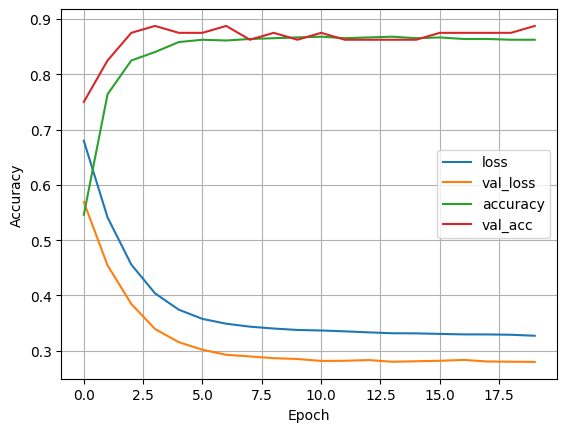

In [19]:
def plot_loss(history):
    plt.plot(history.history["loss"], label="loss")
    plt.plot(history.history["val_loss"], label="val_loss")
    plt.xlabel("Epoch")
    plt.ylabel("Error")
    plt.legend()
    plt.grid(True)

def plot_acc(history):
    plt.plot(history.history["accuracy"], label="accuracy")
    plt.plot(history.history["val_accuracy"], label="val_acc")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.grid(True)
    
plot_loss(history)
plot_acc(history)

## Regression problem

In [5]:
# Import necessary libraries
import tensorflow as tf
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, r2_score

In [6]:
# Generate synthetic dataset for regression prediction
X, y = make_regression(n_samples=1000, n_features=4, n_targets=1, random_state=1)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

# Build neural network model
inp = tf.keras.layers.Input(shape=(4,))
x = tf.keras.layers.Dense(16, activation="relu")(inp)
x = tf.keras.layers.Dense(16, activation="relu")(x)
out = tf.keras.layers.Dense(1, activation="linear")(x)

# Define the model
model = tf.keras.Model(inp, out)

# Compile the model
model.compile(optimizer="adam", loss="mse", metrics=["mse"])

# Train the model
history = model.fit(X_train, y_train, validation_split=0.2, batch_size=16, epochs=200)

# Print model summary
model.summary()

# Predict values for the test holdout set
y_pred = model.predict(X_test)

R2Score = r2_score(y_test, y_pred)
print(f"R2 Score is approx. : {R2Score:.3f}")

Epoch 1/200
40/40 [==============================] - 0s 2ms/step - loss: 19851.6758 - mse: 19851.6758 - val_loss: 24810.0254 - val_mse: 24810.0254
Epoch 2/200
40/40 [==============================] - 0s 828us/step - loss: 19806.9980 - mse: 19806.9980 - val_loss: 24731.1055 - val_mse: 24731.1055
Epoch 3/200
40/40 [==============================] - 0s 786us/step - loss: 19735.7031 - mse: 19735.7031 - val_loss: 24605.5645 - val_mse: 24605.5645
Epoch 4/200
40/40 [==============================] - 0s 823us/step - loss: 19600.8945 - mse: 19600.8945 - val_loss: 24342.6992 - val_mse: 24342.6992
Epoch 5/200
40/40 [==============================] - 0s 786us/step - loss: 19318.5723 - mse: 19318.5723 - val_loss: 23840.0781 - val_mse: 23840.0781
Epoch 6/200
40/40 [==============================] - 0s 806us/step - loss: 18802.5352 - mse: 18802.5352 - val_loss: 22979.1641 - val_mse: 22979.1641
Epoch 7/200
40/40 [==============================] - 0s 788us/step - loss: 17951.8516 - mse: 17951.8516 - va

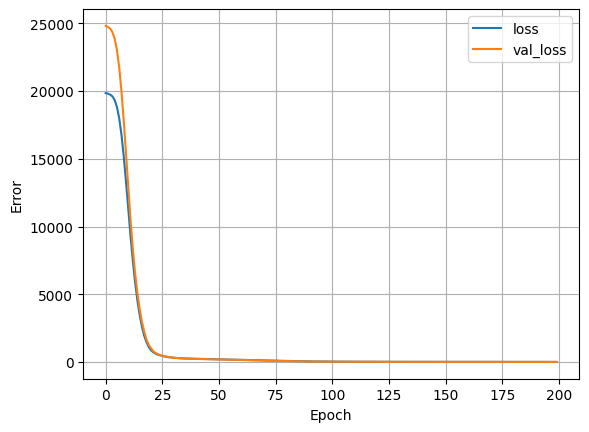

In [7]:


plot_loss(history)